In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install transformers datasets evaluate -q
!pip install jiwer -q
!pip uninstall pyarrow
!pip install pyarrow
!pip install transformers[torch]
#y!pip uninstall accelerate
!pip install accelerate -U

In [2]:
from huggingface_hub import notebook_login

notebook_login()

In [4]:
def read_json(path):
    with open(path,'r') as f:
        json_f = json.load(f)
        return json_f

<ipython-input-19-40d566ce8ad9>:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  a = imread(test_fig_id)


49

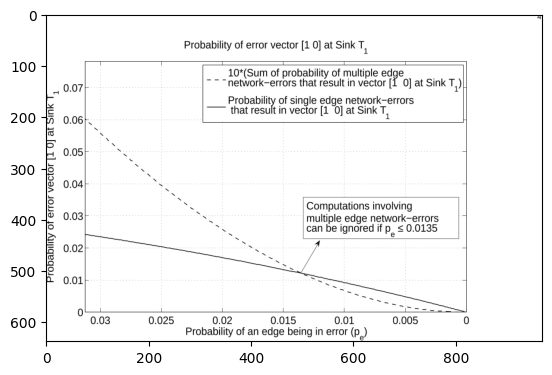

In [19]:
import json
import matplotlib.pyplot as plt
from imageio import imread

file_idx_test = read_json('/content/drive/MyDrive/Colab Notebooks/SciCap-Caption-All/test/1001.1026v1-Figure2-1.json')
file_idx_train = read_json('/content/drive/MyDrive/Colab Notebooks/SciCap-Caption-All/train/1001.0025v1-Figure5-1.json')
file_idx_val = read_json('/content/drive/MyDrive/Colab Notebooks/SciCap-Caption-All/val/2011.10028v1-Figure5-1.json')

items = file_idx_test.items()
#print(items)
test_fig_id = '/content/drive/MyDrive/Colab Notebooks/SciCap-No-Subfig-Img/test/'+items.mapping.get('figure-ID')

a = imread(test_fig_id)
plt.imshow(a)

caption = items.mapping.get('2-normalized').items().mapping.get('2-2-advanced-euqation-bracket').items().mapping.get('caption')
len(caption)

#file_idx_train
#file_idx_val



In [5]:
import os
import json
import matplotlib.pyplot as plt
from imageio import imread
import pandas as pd
from datasets import Dataset, DatasetDict

dict_list = []
path = '/content/drive/MyDrive/Colab Notebooks/SciCap-Caption-All/train'
file_names = os.listdir(path)
print(len(file_names))
for file_name in file_names:
    try:
        json_file = read_json(f'{path}/{file_name}')
        items = json_file.items()
        #print(items)
        image_path = "/content/drive/MyDrive/Colab Notebooks/SciCap-No-Subfig-Img/train/"+items.mapping.get('figure-ID')

        caption = items.mapping.get('2-normalized').items().mapping.get('2-2-advanced-euqation-bracket').items().mapping.get('caption')
        if(os.path.exists(image_path)):
           row_dict = {'FileName': image_path, 'Caption': caption}
           dict_list.append(row_dict)

    except Exception as e:
        print(f"Error processing {file_name}: {str(e)}")
        continue
print(len(dict_list))
df = pd.DataFrame(dict_list)
data_dict = {
    'FileName': df['FileName'].tolist(),
    'Caption':  df['Caption'].tolist()
}

dataset = Dataset.from_dict(data_dict)
dataset_dict = DatasetDict({
    'train': dataset
})
train_ds = dataset_dict['train']
train_ds

473
167


Dataset({
    features: ['FileName', 'Caption'],
    num_rows: 167
})

In [5]:
dict_list = []
path = '/content/drive/MyDrive/Colab Notebooks/SciCap-Caption-All/val'
file_names = os.listdir(path)
print(len(file_names))
for file_name in file_names:
    try:
        json_file = read_json(f'{path}/{file_name}')
        items = json_file.items()
        #print(items)
        image_path = "/content/drive/MyDrive/Colab Notebooks/SciCap-No-Subfig-Img/val/"+items.mapping.get('figure-ID')
        caption = items.mapping.get('2-normalized').items().mapping.get('2-2-advanced-euqation-bracket').items().mapping.get('caption')
        if(os.path.exists(image_path)):
           row_dict = {'FileName': image_path, 'Caption': caption}
           dict_list.append(row_dict)

    except Exception as e:
        print(f"Error processing {file_name}: {str(e)}")
        continue
print(len(dict_list))
df = pd.DataFrame(dict_list)
data_dict = {
    'FileName': df['FileName'].tolist(),
    'Caption':  df['Caption'].tolist()
}

dataset = Dataset.from_dict(data_dict)
dataset_dict = DatasetDict({
    'val': dataset
})
val_ds = dataset_dict['val']
val_ds

483
7


Dataset({
    features: ['FileName', 'Caption'],
    num_rows: 7
})

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image, UnidentifiedImageError # Import UnidentifiedImageError



In [ ]:
from textwrap import wrap
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
from imageio import imread

req = urllib.request.Request(train_ds[0]["image_url"], headers={'User-Agent': 'Chrome/47.0.2526.106'})
f = urllib.request.urlopen(req).read()

a = imread(f)
plt.imshow(a)
#plt.show()


def plot_images(images, captions):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        caption = captions[i]
        caption = "\n".join(wrap(caption, 12))
        plt.title(caption)

        req = urllib.request.Request(images[i], headers={'User-Agent': 'Chrome/47.0.2526.106'})
        f = urllib.request.urlopen(req).read()

        a = imread(f)
        plt.imshow(a)

        plt.axis("off")


sample_images_to_visualize = [np.array(train_ds[i]["image_url"]) for i in range(5)]
sample_captions = [train_ds[i]["caption"] for i in range(5)]
plot_images(sample_images_to_visualize, sample_captions)


In [6]:
from transformers import AutoProcessor

checkpoint = "microsoft/git-base"
processor = AutoProcessor.from_pretrained(checkpoint)


preprocessor_config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
import sys
import urllib.request
import numpy as np

req = urllib.request.Request(train_ds[0]["image_url"], headers={'User-Agent': 'Chrome/47.0.2526.106'})
f = urllib.request.urlopen(req).read()
print(type(f))
sys.stdout.write(f)

open('/filename.png', 'wb').write(f)



In [7]:
import sys
from PIL import Image
import numpy as np

reqimages = []
reqDict = dict()
for x in train_ds["FileName"]:
    #req = urllib.request.Request(x, headers={'User-Agent': 'Chrome/47.0.2526.106'})
    #f = urllib.request.urlopen(req).read()
    #reqDict[f] = x
    try:
        f  = Image.open(x).getdata()
        reqimages.append(f)
        #print(type(f))
        #print( sys.getsizeof(f))
    except Exception as e:
        continue
print(len(reqimages))
rgb_values = np.concatenate([img for img in reqimages], axis=0) / 255

#rgb_values = np.concatenate([Image.open(test_fig_id).getdata()], axis=0) / 255


# rgb_values.shape == (n, 3),
# where n is the total number of pixels in all images,
# and 3 are the 3 channels: R, G, B.

# Each value is in the interval [0; 1]

mu_rgb = np.mean(rgb_values, axis=0)  # mu_rgb.shape == (3,)
std_rgb = np.std(rgb_values, axis=0)  # std_rgb.shape == (3,)

print(mu_rgb)
print(std_rgb)

167
[0.96305279 0.95976804 0.96147718]
[0.1446056  0.14918483 0.14800113]


In [8]:
from PIL import Image
#import numpy as np
import pandas as pd
from datasets import Dataset, DatasetDict

# create an empty dataframe with desired columns

#dict_list = []
#row_dict = {'FileName': test_fig_id, 'Caption': caption}
#dict_list.append(row_dict)

#df = pd.DataFrame(dict_list)
#data_dict = {
 #   'FileName': df['FileName'].tolist(),
 #   'Caption':  df['Caption'].tolist()
#}

#dataset = Dataset.from_dict(data_dict)

#dataset_dict = DatasetDict({
#    'train': dataset
#})
#train_ds = dataset_dict['train']

def transforms(example_batch):

    #imgpath = []
    #for x in example_batch["image_url"]:
     # img =Image.open(urllib.request.Request(x, headers={'User-Agent': 'Chrome/47.0.2526.106'}))
     # imgpath.append(img)
    #print(type(example_batch))

    #plt.imshow(reqimages[0])

    #images = [x for x in reqimages]
    #print(type(images))
    #captions = [x for x in example_batch["caption"]]
    #inputs = processor(images=images, text=captions, padding="max_length")
    imgProcessor = processor.image_processor
    txtTokenizer = processor.tokenizer
    txtTokenizer.padding_side = "left"
    txtTokenizer.truncation_side = "left"

    imgProcessor.do_normalize
    # rgb_values.shape == (n, 3),
    # where n is the total number of pixels in all images,
    # and 3 are the 3 channels: R, G, B.

    # Each value is in the interval [0; 1]
    imagesarr = []
    captionsarr = []
    for file_name, caption in zip(example_batch["FileName"], example_batch["Caption"]):  # Iterate over file names and captions
        # Assuming file_name is a valid path or a file-like object
        image = Image.open(file_name)
        imagesarr.append(image)
        captionsarr.append(caption)
    images = imagesarr[0]
    captions = captionsarr[0]
    #captions = ["A Stage 1 Pokemon Card of type Lightning with the title Raichu and 90 HP of rarity Rare Holo evolved from Pikachu from the set HeartGold & SoulSilver and the flavor text: If the electric pouches in its cheeks become fully charged, both ears will stand straight up. It has the attack Iron Tail with the cost Colorless, the energy cost 1 and the damage of 30 with the description: Flip a coin until you get tails. This attack does 30 damage times the number of heads. It has the attack Thunderbolt with the cost Lightning, Lightning, the energy cost 2 and the damage of 100 with the description: Discard all Energy attached to Raichu. It has weakness against Fighting 2. It has resistance against Metal -20. "]
    imgProcessor.preprocess(images=imagesarr,image_mean=mu_rgb[:3], image_std=std_rgb[:3])

    inputs = processor(images=imagesarr, text=captionsarr, return_tensors="pt",padding=True, truncation=True)
    inputs.update({"labels": inputs["input_ids"]})
    #print(inputs.pop("labels"))
    print(type(inputs))
    return inputs


train_ds.set_transform(transforms)
#test_ds.set_transform(transforms)
val_ds.set_transform(transforms)

In [10]:
print(train_ds.shape)
#print(test_ds.shape)
#print(test_ds[0])
print(val_ds.shape)

(167, 2)
(7, 2)


In [9]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

model = AutoModelForCausalLM.from_pretrained(checkpoint)
# Load the tokenizer associated with the model
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokens = items.mapping.get('2-normalized').items().mapping.get('2-2-advanced-euqation-bracket').items().mapping.get('tokens')
if isinstance(tokens, list):
    tokens = " ".join(tokens)  # Join list of tokens into a single string


# Tokenize the input text
inputs = tokenizer(tokens, return_tensors="pt")

# Get the input IDs
input_ids = inputs["input_ids"]

# Forward pass
#model.forward(input_ids=input_ids, pixel_values=torch.randn(1, 3, 224, 224))


#model_config = model.config
#model_config.
#print(model.config)


config.json:   0%|          | 0.00/2.82k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/707M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

In [10]:
from evaluate import load
import torch

wer = load("wer")


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predicted = logits.argmax(-1)
    decoded_labels = processor.batch_decode(labels, skip_special_tokens=True)
    decoded_predictions = processor.batch_decode(predicted, skip_special_tokens=True)
    wer_score = wer.compute(predictions=decoded_predictions, references=decoded_labels)
    return {"wer_score": wer_score}

In [11]:
#!pip uninstall transformers[torch]

from transformers import TrainingArguments, Trainer

model_name = checkpoint.split("/")[1]

training_args = TrainingArguments(
    output_dir=f"{model_name}-scicap",
    learning_rate=5e-5,
    num_train_epochs=10,
    fp16=True,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    gradient_accumulation_steps=2,
    save_total_limit=3,
    evaluation_strategy="steps",
    eval_steps=100,
    save_strategy="steps",
    save_steps=100,
    logging_steps=50,
    remove_unused_columns=False,
    push_to_hub=False,
    label_names=["labels"],
    load_best_model_at_end=True
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
from torch.nn import CrossEntropyLoss

def compute_loss(self, model, inputs, return_outputs=False):
    labels = inputs.pop("labels")  # Remove labels from inputs as they are not model inputs
    outputs = model(**inputs)  # Forward pass
    logits = outputs.logits
    loss_fct = CrossEntropyLoss()
    loss = loss_fct(logits.view(-1, logits.size(-1)), labels.view(-1))
    return (loss, outputs) if return_outputs else loss

In [12]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    compute_metrics=compute_metrics
)

In [13]:
trainer.train()

Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Step,Training Loss,Validation Loss


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>
<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>
<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>
<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>
<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>
<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>
<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>
<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>


Unused or unrecognized kwargs: padding, truncation.
Unused or unrecognized kwargs: padding, truncation.


<class 'transformers.tokenization_utils_base.BatchEncoding'>
<class 'transformers.tokenization_utils_base.BatchEncoding'>


TrainOutput(global_step=50, training_loss=7.277974243164063, metrics={'train_runtime': 61.5726, 'train_samples_per_second': 27.122, 'train_steps_per_second': 0.812, 'total_flos': 140149506096360.0, 'train_loss': 7.277974243164063, 'epoch': 9.090909090909092})

In [ ]:
#trainer.push_to_hub()

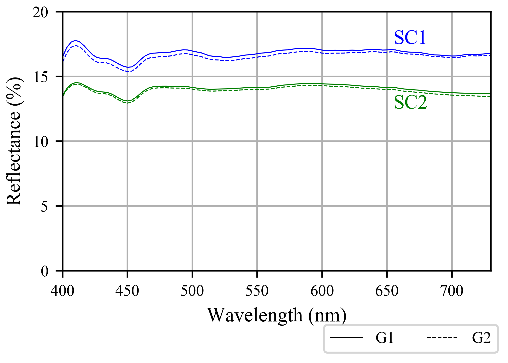

In [14]:
from PIL import Image
import requests

#print (test_ds[0])
url = '/content/drive/MyDrive/Colab Notebooks/SciCap-No-Subfig-Img/val/2011.10028v1-Figure5-1.png'
image = Image.open(url)
image

In [15]:
device = "cuda" if torch.cuda.is_available() else "cpu"

inputs = processor(images=image, return_tensors="pt").to(device)
pixel_values = inputs.pixel_values

In [16]:
generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)


the number of the u - tk.
